Amount of Arrests

In [2]:
import pandas as pd

##importing the data set for arrests in pittsburgh
arrests = pd.read_csv("PittsburghArrests.csv")

%matplotlib inline

In [3]:
##testing to see how many arrests have happened in each neighborhood, specifically for retail theft
crime_query_mask = arrests["OFFENSES"].str.contains("Retail Theft", na = False)
arrest = arrests[crime_query_mask]
arrest

_id       PK       CCR   AGE GENDER RACE           ARRESTTIME  \
0          1  1975272  16158872  42.0      F    B  2016-08-24T12:20:00   
2          3  1974466  16144165  63.0      F    B  2016-08-03T16:45:00   
5          6  1974556  16144301  45.0      M    W  2016-08-15T13:30:00   
22        23  1975395  16162377  26.0      F    B  2016-08-29T11:20:00   
23        24  1975398  16163197  22.0      M    W  2016-08-30T12:50:00   
...      ...      ...       ...   ...    ...  ...                  ...   
64950  86187  2062162  23135113  34.0      F    W  2023-10-04T13:00:00   
64954  86191  2062166  23136700  50.0      M    B  2023-08-29T14:51:00   
64960  86221  2062200  23126547  44.0      M    B  2023-09-01T08:00:00   
64967  86228  2062223  23136538  48.0      M    W  2023-08-29T10:06:00   
64984  86245  2062243  23137255  22.0      F    W  2023-08-30T15:51:00   

                                     ARRESTLOCATION  \
0         4700 Block Centre AV Pittsburgh, PA 15213   
2        900 Block Freeport RD Fox Chapel, PA 15238   
5             600 Block 1st AV Pittsburgh, PA 15219   
22     600 Block Smithfield ST Pittsburgh, PA 15222   
23       2000 Block Wharton ST Pittsburgh, PA 15203   
...                                             ...   
64950         600 Block 1st AV Pittsburgh, PA 15219   
64954     5500 Block Centre AV Pittsburgh, PA 15232   
64960         900 Block 2nd AV Pittsburgh, PA 15219   
64967     5500 Block Centre AV Pittsburgh, PA 15232   
64984     5500 Block Centre AV Pittsburgh, PA 15232   

                                                OFFENSES  \
0                                     3929 Retail Theft.   
2                                     3929 Retail Theft.   
5                                     3929 Retail Theft.   
22     3929 Retail Theft. / 13(a)(16) Possession of C...   
23     3929(a)(1) Retail Theft; takes possession of, ...   
...                                                  ...   
64950                                 3929 Retail Theft.   
64954                                 3929 Retail Theft.   
64960  3503(b)(1)(ii) Defiant Trespass Notice Posted ...   
64967                                 3929 Retail Theft.   
64984  2709(a)(1) Harassment by Physical Contact, or ...   

                                   INCIDENTLOCATION  \
0         4700 Block Centre AV Pittsburgh, PA 15213   
2        900 Block Freeport RD Fox Chapel, PA 15238   
5       800 Block Hazelwood AV Pittsburgh, PA 15217   
22     600 Block Smithfield ST Pittsburgh, PA 15222   
23       2000 Block Wharton ST Pittsburgh, PA 15203   
...                                             ...   
64950       6200 Block Penn AV Pittsburgh, PA 15206   
64954     5500 Block Centre AV Pittsburgh, PA 15232   
64960  600 Block Smithfield ST Pittsburgh, PA 15222   
64967     5500 Block Centre AV Pittsburgh, PA 15232   
64984     5500 Block Centre AV Pittsburgh, PA 15232   

              INCIDENTNEIGHBORHOOD INCIDENTZONE  INCIDENTTRACT  \
0                       Bloomfield            5          804.0   
2                         Westwood            5         2811.0   
5                       Greenfield            4         1517.0   
22     Golden Triangle/Civic Arena            2          201.0   
23                South Side Flats            3         1702.0   
...                            ...          ...            ...   
64950                 East Liberty            5         1115.0   
64954                    Shadyside            4          709.0   
64960    Central Business District            2          201.0   
64967                    Shadyside            4          709.0   
64984                    Shadyside            4          709.0   

       COUNCIL_DISTRICT  PUBLIC_WORKS_DIVISION          X          Y  
0                   8.0                    2.0 -79.949277  40.452551  
2                   9.0                    2.0 -79.891803  40.486625  
5                   5.0                    3.0 -79.929238  40.419699  


In [6]:
nghFreq = {}

for index, row in arrests.iterrows():
    ngh= row["INCIDENTNEIGHBORHOOD"]
    amountArrests = row["OFFENSES"]
    if pd.isnull(ngh):
        continue
    if(ngh in nghFreq):
        nghFreq[ngh] += 1
    else:
        nghFreq[ngh] = 1
        
print(nghFreq)

{'Bloomfield': 972, 'Outside City': 309, 'Westwood': 222, 'East Allegheny': 2156, 'Crafton Heights': 587, 'Greenfield': 531, 'Brookline': 1346, 'Regent Square': 36, 'East Liberty': 1856, 'East Hills': 1162, 'Carrick': 2301, 'Allegheny Center': 1228, 'South Side Flats': 3386, 'Sheraden': 1258, 'East Carnegie': 48, 'Golden Triangle/Civic Arena': 83, 'Point Breeze North': 279, 'Perry South': 1041, 'Allentown': 930, 'North Shore': 796, 'Marshall-Shadeland': 1491, 'Central Oakland': 512, 'Middle Hill': 920, 'Strip District': 492, 'Lincoln-Lemington-Belmar': 1321, 'Central Northside': 23, 'Troy Hill-Herrs Island': 6, 'Highland Park': 549, 'Homewood North': 1932, 'Northview Heights': 697, 'Brighton Heights': 1095, 'Hazelwood': 1366, 'Perry North': 585, 'Bedford Dwellings': 656, 'Elliott': 650, 'Beechview': 1167, 'Fineview': 789, 'Glen Hazel': 164, 'Spring Hill-City View': 702, 'Bluff': 1463, 'Manchester': 459, 'Homewood West': 753, 'Outside County': 55, 'Point Breeze': 297, 'Homewood South': 

Conclusion: The neighborhoods with the least amount of arrests are optimal for our goal. With this in mind, the four neighborhoods that look the most plausible as the "Best" neighborhood form this singular dataset are Troy Hill-Herrs Island, Mt. Oliver Boro, Central Northside, and Regent Square.

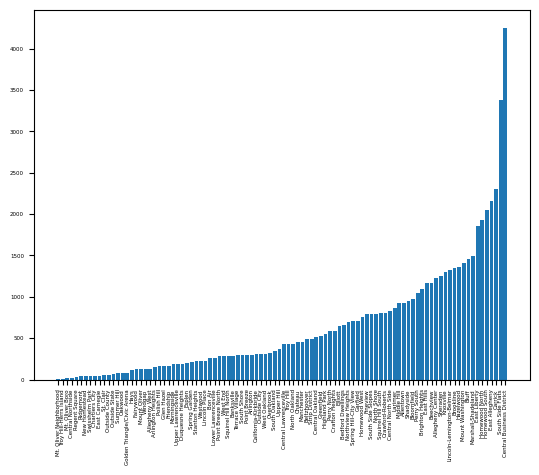

In [7]:
import matplotlib.pyplot as plt


sortedData = dict(sorted(nghFreq.items(), key=lambda item: item[1]))
plt.rcParams.update({'font.size': 4})

plt.bar(*zip(*sortedData.items()))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
import json

with open('arrests.json', 'w') as fp:
    json.dump(nghFreq, fp)